In [1]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"    # this disables GPU when uncommented
from tensorflow.python.client import device_lib
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv

In [2]:
tf.random.set_seed(5) # to make sure the experiment is reproducible.

In [3]:
all_ds = pd.read_csv('G:\my drive\machine learning\Cholangiocarcinoma_ML\Data_Files\cancer_mutations.txt', sep='\t')  
all_ds

,cancer_type,ABCA13,ABCA2,ABCA7,ABCC1,ABL1,AC0087381,ACAN,ACLY,ACVR1,...,YEATS4,YES1,YY1,ZEB2,ZFHX3,ZNF318,ZNF415,ZNF521,ZNF90,ZRSR2
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Include and use only the mutations with a correlation <> 0 after LASSO regession of the full data set
cols_to_use = ['cancer_type','ABCA13','ABCA2','ABCC1','ABL1','ACAN','ACLY','ACVR1','ADAMTS20','AGO2','AKAP6','AKT1','AKT2','ANK3','APC','APOB','AR','ARAF','ARID1A','ARID2','ARID5B','ASXL2','ATF7IP','ATM','ATP10A','ATRX','AURKA','AURKB','AXIN1','B2M','BAP1','BBC3','BCL10','BCL2L11','BCL6','BIRC6','BLM','BRCA1','BRD7','BRPF3','BSN','BTK','CALR','CAMTA1','CARD11','CBFB','CCND1','CD79B','CDH1','CDK12','CDK8','CDKN1A','CDKN2Ap16INK4A','CDKN2B','CDKN2C','CECR2','CHD5','CHEK1','COL11A1','COL7A1','CREBBP','CSF1R','CSMD1','CSMD3','CTCF','CTNNA2','CTNNB1','CUBN','CYSLTR2','DAPK1','DICER1','DIDO1','DMXL2','DNAJB1','DNMT1','DNMT3A','DPYSL3','ECE2','EED','EFS','EGFR','EIF1AX','EIF4E','EIF4G2','ELF3','EP300','EPCAM','EPHA2','EPHA3','EPPK1','ERBB3','ERCC3','ERCC5','ERRFI1','ESR1','ESRRG','ESX1','ETV1','EXT2','FAT1','FAT2','FBN2','FBXL13','FBXW7','FGF19','FGFR2','FGFR3','FGFR4','FLT1','FLT4','FOS','FOXA1','FSIP2','FUBP1','FYN','GATA1','GATA2','GATA3','GNA11','GNAQ','GNAS','GPR112','GPR98','GPS2','GRIN2A','HCFC1','HIPK3','HIST1H1C','HIST1H3A','HIST1H3B','HIST1H3H','HIST1H3I','HIST3H3','HLAA','HLAB','HMCN1','HNF1A','HOXB13','HRAS','HUWE1','IDH1','IDH2','IKBKB','IKBKE','IKZF1','INHBA','INPP4B','INPPL1','ITCH','JAK1','JAK2','JARID2','KCNA4','KDM5A','KDM6A','KEAP1','KIT','KMT2D','KNSTRN','KRAS','LAMA1','LAMA2','LAMA3','LATS1','LMO1','LRP1B','LRP2','LYN','MAP3K1','MAPK3','MARCKS','MAX','MDM4','MED12','MEF2B','MEN1','MET','MGA','MLH1','MLL2','MRE11A','MTOR','MUC1','MUC16','MUC17','MUC2','MUC4','MUC6','MYC','MYCN','MYOD1','NCOA3','NCOR1','NEB','NEK4','NF2','NKX21','NKX31','NOTCH1','NOTCH2','NOTCH3','NOTCH4','NRAS','NTRK2','NUF2','NUP93','OBSCN','OGT','OR10Z1','P4HTM','PAK1','PAK7','PALB2','PAX5','PBRM1','PCDH10','PCLO','PDCD1','PDE4DIP','PDGFA','PDGFRA','PDPK1','PEG3','PELP1','PGR','PHOX2B','PIK3C2G','PIK3CA','PIK3CD','PIK3CG','PIK3R1','PIM1','PLCG2','PLEC','PMEPA1','PPFIA4','PPM1D','PPP6C','PREX2','PTCH1','PTEN','PTP4A1','PTPN11','PTPRD','PTPRT','PXDN','RAD51C','RAD51D','RADIL','RARA','RASA1','RB1','RBM10','RECQL4','RHOA','RICTOR','RIMS1','RNF213','RNF43','ROBO1','ROBO2','ROBO3','ROR2','ROS1','RPAP1','RPS6KA4','RPS6KB2','RPTOR','RRAS','RRAS2','RXRA','RYR2','SACS','SBNO1','SDHAF2','SESN1','SESN3','SETD2','SF3B1','SH2D1A','SIRT6','SLC22A23','SLC5A5','SLTM','SMAD2','SMAD4','SMG1','SOX2','SPEN','SPOP','SPTA1','SRCAP','STAG2','STAT5A','STK40','SYNE1','TAF10','TBX3','TCF7L2','TEK','TENM1','TENM2','TERT','TET2','TET3','TGFBR2','THBS3','TMPRSS2','TNFRSF14','TONSL','TOP1','TP53','TP63','TRAF7','TRIM56','TSC1','TSC2','U2AF1','UNC5C','VAV3','VHL','VTCN1','WHSC1','WWTR1','XIRP2','XPO1','XRCC2','YAP1','YES1','ZEB2','ZFHX3','ZNF521']
all_ds = all_ds[cols_to_use]
all_ds

,cancer_type,ABCA13,ABCA2,ABCC1,ABL1,ACAN,ACLY,ACVR1,ADAMTS20,AGO2,...,WHSC1,WWTR1,XIRP2,XPO1,XRCC2,YAP1,YES1,ZEB2,ZFHX3,ZNF521
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
all_ds = all_ds.sample(frac=1) # This will randomly shuffle the rows to make sure the data is not sorted. (if the data is sorted then we may end up with test dataset
all_ds.to_csv('G:\my drive\machine learning\Cholangiocarcinoma_ML\Data_Files\cancer_mutations_post_LASSO.csv',index=False)
all_ds


,cancer_type,ABCA13,ABCA2,ABCC1,ABL1,ACAN,ACLY,ACVR1,ADAMTS20,AGO2,...,WHSC1,WWTR1,XIRP2,XPO1,XRCC2,YAP1,YES1,ZEB2,ZFHX3,ZNF521
16204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Split the data into 70% training and 30% test & validation sets
train_dataset, temp_test_dataset =  train_test_split(all_ds, test_size=0.3)

In [7]:
# Split the full data set into training and testing & validation sets
train_dataset, temp_test_dataset =  train_test_split(all_ds, test_size=0.70)
# Split the testing and validation data set created above to be 50% test and 50% validation. 
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.50)

In [8]:
print(f" Train dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

 Train dataset       : (8829, 332)
 Test dataset       : (10301, 332)
 Validation dataset : (10301, 332)


In [9]:
train_labels1 = train_dataset.pop('cancer_type')
test_labels1 = test_dataset.pop('cancer_type')
valid_labels1 = valid_dataset.pop('cancer_type')

In [10]:
# Encode the labeles
train_labels = pd.get_dummies(train_labels1, prefix='Label')
valid_labels = pd.get_dummies(valid_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')

In [11]:
%%time
# We decalred a function for creating a model.
def build_model1_two_hidden_layers():
    model = Sequential()
    model.add(Dense(176, input_shape = (train_dataset.shape[1],)))    # Input layer  {neurons=(# training samples/(5*(# input neurons+ # output neurons))}       
    model.add(Dense(176, input_shape = (train_dataset.shape[1],)))    # Input layer  {neurons=(# training samples/(5*(# input neurons+ # output neurons))}       
    model.add(Dense(2, activation='sigmoid'))                         # Output layer {must = max number of classes in data set}
     # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
     # Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.001 # this needs to be adjusted based on the data being learned
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy',#from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) # for regression problems, mean squared error (MSE) is often employed
    return model

EPOCHS = 80
batch_size = 36
#batch_size = 18

model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()

#with tf.device('/CPU:0'): # it can be with '/CPU:0'
with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        train_dataset, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(train_dataset.shape[0] / batch_size) ,
        validation_data = (valid_dataset, valid_labels),   
    )

Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 176)               58432     
                                                                 
 dense_1 (Dense)             (None, 176)               31152     
                                                                 
 dense_2 (Dense)             (None, 2)                 354       
                                                                 
Total params: 89,938
Trainable params: 89,938
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
245/245 [==============================] - 1s 4ms/step - loss: 0.1342 - accuracy: 0.9672 - val_loss: 0.1164 - val_accuracy: 0.9702
Epoch 2/80
245/245 [==============================] - 1s 3ms/step - loss: 0.0962 - accuracy: 0.9733 - val_loss: 0.1105 - val_accuracy: 0.973

In [12]:
# model training takes about 2min 20s on Matt's PC
#
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
75,0.076333,0.978733,0.143261,0.973789,75
76,0.077921,0.978278,0.146454,0.974468,76
77,0.073719,0.979188,0.141821,0.974080,77
78,0.069808,0.980894,0.157154,0.973886,78
79,0.076237,0.977937,0.148925,0.974080,79


In [13]:
example_batch = test_dataset[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([[8.7246346e-01, 1.3552514e-01],
       [9.9999738e-01, 4.6962541e-06],
       [1.0000000e+00, 1.4770413e-08],
       [9.9958509e-01, 6.4232299e-04],
       [9.7163242e-01, 3.3773832e-02],
       [9.1069782e-01, 9.5032588e-02],
       [9.6067399e-01, 4.4048056e-02],
       [9.3836862e-01, 3.7028257e-02],
       [9.6995753e-01, 1.9596150e-02],
       [9.9999905e-01, 3.0314059e-06]], dtype=float32)

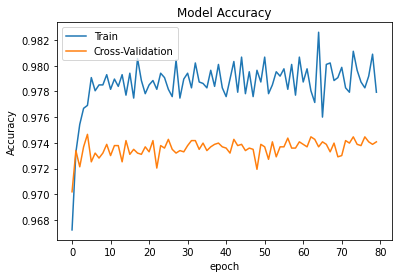

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

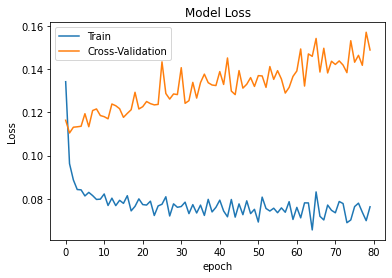

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [16]:
print('Train Split: ')
loss, accuracy = model.evaluate(train_dataset, train_labels, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
276/276 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.9797
Accuracy   :  0.98 


In [17]:
print('Evaluation Split: ')
loss, accuracy =  model.evaluate(valid_dataset, valid_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
322/322 - 0s - loss: 0.1489 - accuracy: 0.9741 - 437ms/epoch - 1ms/step
Accuracy   :  0.97 


In [18]:
print('Test Split: ')
loss, accuracy =  model.evaluate(test_dataset, test_labels, verbose=2)

print("Accuracy   : {:5.2f}".format(accuracy))

Test Split: 
322/322 - 0s - loss: 0.1306 - accuracy: 0.9765 - 414ms/epoch - 1ms/step
Accuracy   :  0.98


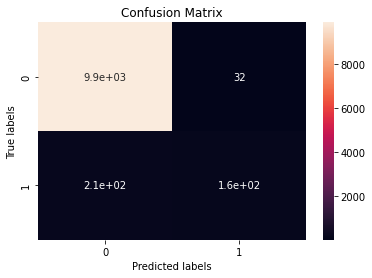

In [19]:
# import seaborn as sns
# import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
ax= plt.subplot()
predict_results = model.predict(test_dataset)
# predict_results = (predict_results.argmax())
predict_results= predict_results.argmax(axis = 1)
cm = confusion_matrix(test_labels1, predict_results)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

In [29]:
# This is a known cholangiocarcinoma sample
cc = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
#print(cc)
print(model.predict(cc))

[[5.253501e-09 1.000000e+00]]


In [27]:
# This is a known NON-cholangiocarcinoma sample
notcc = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
#print(notcc)
print(model.predict(notcc))

[[0.9059475  0.10484632]]
